In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
df.drop(['Id'],axis=1,inplace=True)

# lets find out the missing value, its percentage and data type 

In [6]:

total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,


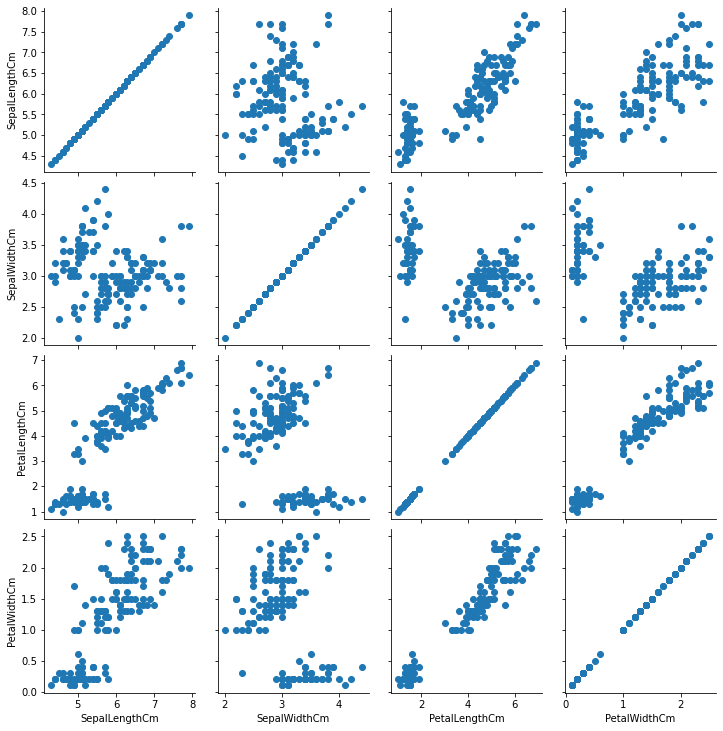

In [7]:
g = sns.PairGrid(df)
g.map(plt.scatter);


# lets see species by feature mean

In [11]:
df.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [41]:
Iris_setosa=df[df['Species']=='Iris-setosa']
Iris_versicolor=df[df['Species']=='Iris-versicolor']
Iris_virginica=df[df['Species']=='Iris-virginica']

In [42]:
Iris_setosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [43]:
Iris_versicolor.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [44]:
Iris_virginica.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [45]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
y=df['Species']
y=pd.array(y)
y=pd.DataFrame(y,columns=['Species']) 

In [18]:
df.drop(['Species'],axis=1,inplace=True)

In [19]:
x=df.copy()

In [20]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

In [24]:
classifier.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
SepalLengthCm=[5.1]
SepalWidthCm=[3.5]
PetalLengthCm=[1.56]
PetalWidthCm=[0.5]
xt=pd.DataFrame(SepalLengthCm,columns=['SepalLengthCm'])

In [32]:
xt['SepalWidthCm']=pd.Series(SepalWidthCm)
xt['PetalLengthCm']=pd.Series(PetalLengthCm)
xt['PetalWidthCm']=pd.Series(PetalWidthCm)

In [33]:
xt

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.56,0.5


In [34]:
y_pred=classifier.predict(xt)

In [35]:
y_pred

array(['Iris-setosa'], dtype=object)

In [36]:
import pickle
filename = 'iris.pkl'
pickle.dump(classifier, open(filename, 'wb'))